Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы хотим спланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. 

Имеем следующие данные:<br>
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>

### Содержание
### [1. Анализ данных](#section_id1)
### [2. Подготовка данных](#section_id2)
### [3. Исследовательский анализ данных](#section_id3)
### [4. Портрет пользователя каждого региона](#section_id4)
### [5. Проверка гипотез](#section_id5)
### [6. Общий вывод](#section_id6)

<a id='section_id1'></a>

# Шаг 1. Анализ данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Вывод к шагу 1

Итак, по общей информации видим следующее:<br>
1. Наименование таблицы нужно привести к нижнему регистру;<br>
2. Столбец Name имеет 2 пропуска (если там нет никакой информации, то можем просто удалить 2 строки)
3. В столбце Year_of_Release также имеются пропуска (думаю это никак не повлияет если мы не будем трогать данные ячейки);
4. Столбец Genre имеются 2 пропуска (данные пропуски можно обработать вручную, посмотрев в интернете жанр по названию игры);
5. В столбцах Critic_Score, User_Score и Rating имеются много пропусков (тут можно заменить пропуска медианой или средним значением, учитывая жанр игр, кол-ва продаж и от платформы).<br>
Также видим, что некоторые игры имеют ноль продаж по Северной Америке, Европе и Японии

<a id='section_id2'></a>

# 2. Подготовка данных

In [5]:
#приведем наименование столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#приведем столбец year_of_release к типу int, т.к. года имеют целочисленный тип (перед этим необходимо избавиться от пустых
#значений, заменим их на ноль, предполагая, что ноль это нет данных)
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#удалим эти 2 строки
df.dropna(subset=['name', 'genre'], inplace=True)

In [11]:
#приведем индекс к нормальному состоянию (все по порядку)
df = df.reset_index()

In [12]:
#удалим столбец со старыми индексами
df = df.drop(df.columns[0], axis='columns')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Необходимо также столбец user_score привести к типу float (рейтинг у нас числовой тип), но мы не сможем это сделать, т.к там сидит аббревиатура tbd (to be determined - будет определено). Переведем его к типу NaN

In [14]:
df = df.reset_index()

In [15]:
df = df.drop(df.columns[0],axis=1)

In [16]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', np.nan)

In [18]:
df['user_score'] = df['user_score'].astype('float64')

In [19]:
df['name'].value_counts().head()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Ratatouille                     9
FIFA 14                         9
Name: name, dtype: int64

Видим, что одни и те же игры имеются на разных платформах. На основе этих данных можем заполнить медианой оценку критиков и пользователей, т.к. оценку ставят игре, а не платформе

In [20]:
name_unique = df['name'].unique()
name_unique 

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [21]:
#ради интереса посмотрим срез по одной игре
df[df['name']=='LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
729,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
944,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1138,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1958,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+
2312,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+
2777,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8.0,E10+
3875,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,NaN,NaN,NaN
5053,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
8368,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+


Видим, что разброс по отзывам критиков варьируется от 61 до 83 пунктов, пользователи от 4.8 до 8.1. Чтобы не искажать выходные данные, оставим все как есть. По поводу рейтингов, на всех платформах они идентичны, т.к. рейтинг ставим мы игре, а не платформе.

In [22]:
#создадим цикл по рейтингам 
for i in name_unique:
    unique_rating = df[df['name']==i]['rating'].unique()
    df.loc[(df['name']==i) & (df['rating'].isnull()), 'rating'] = unique_rating[0]

In [23]:
df.loc[(df['name']==i) & (df['rating'].isnull()), 'rating']

16710    NaN
Name: rating, dtype: object

In [24]:
#проверим что получилось после операций
df[df['name']=='LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
729,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
944,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1138,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1958,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,NaN,6.8,E10+
2312,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61.0,5.2,E10+
2777,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82.0,8.0,E10+
3875,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,NaN,NaN,E10+
5053,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+
8368,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78.0,8.1,E10+


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             10214 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Там где NaN он заменил на Е10+

In [26]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [27]:
df[df['critic_score'].isnull()]['platform'].value_counts().head(10)

DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
Name: platform, dtype: int64

Видим, что отзывы критиков отсутвуют на японских платформах (первые 9 платформ японские). Такую же картинку мы видим и по отзывам пользователей и рейтинг игр. Можно предположить, что японские платформы начали появляться уже в начале 90-х, интернет был только у избранных и отзывы критиков и пользователей практически не существовало. В дальнейшем данные столбцы начали учитываться для правильной продажи копий. По поводу рейтингов ситуация следующая: вплоть до 2000-х, т.к. графика была посредственной и игры соответственно такие же, рейтинг особо не учитывался. По мере прогресса, игры начали делаться с более крутой графикой и особой жестокостью (до рейтинга видимо у многих детей появилась эпилепсия и пришлость ставить рейтинг на игры и предупреждать об опасности).

# Вывод к шагу 2

На данном шаге нами были преобразованы столбцы к нормальному виду (нижний регистр). Столбец year_of_release быд приведен к целочисленному типу, т.к. он не может быть дробным. Прежде чем приводить столбец user_score к вещественоому типу, необходимо было разобраться с аббревиатурой tbd. Данная аббревиатура означает to be determined (Будет определено). Как правило, данное сокращение используется, когда разработчик анонсирует какую-либо копмьютерную игру и уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату. Нами были исключены пропуски там, где это было возможно, а именно rating: рейтинг ставится на игры вне зависимости от того на какой платформе вы играете. Пропуски в данных ячейках могут отсутствовать по причине полного отсутствия отзывов в интернете на данные игры определенных платформ (отсутсвие интернета и собирать отзывы пользователей и критиков практически было невозможно на простые игрушки). После предобработки данных были посчитаны суммарные объемы продаж по всем регионам.

<a id='section_id3'></a>

# 3.Исследовательский анализ данных

In [28]:
#нулевые значения приведем обратно в NaN
df['year_of_release'] = df['year_of_release'].where(df['year_of_release'] != 0, np.nan)

In [29]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games_year = df.groupby('year_of_release')['name'].count().reset_index()

In [30]:
games_year

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


In [31]:
title = "Games year"
color = "b"
yscale_log = False
x_label='Год выпуска'
y_label='Кол-во игр'

In [32]:
x_data = games_year['year_of_release']
y_data = games_year['name']

Text(0, 0.5, 'Кол-во игр')

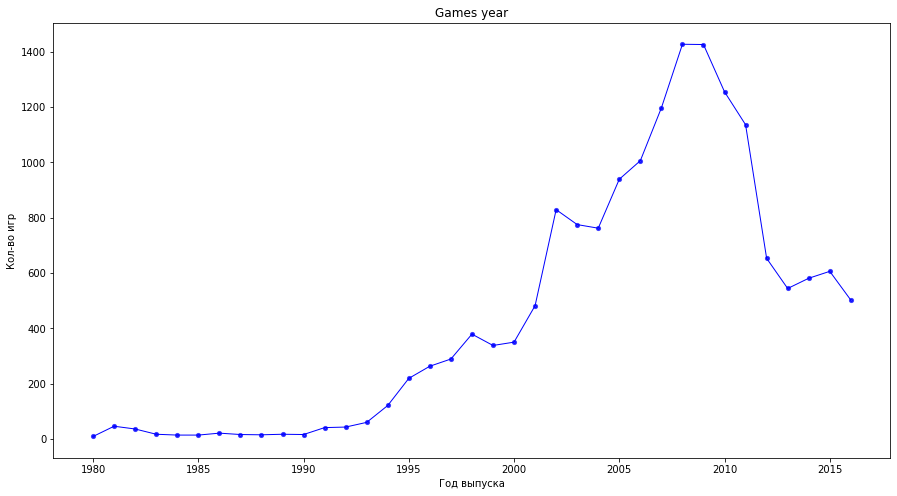

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x_data, y_data, color = color, linewidth = 1)
ax.scatter(x_data, y_data, s=10, color = color, alpha=0.75, linewidth = 2)
ax.set_title(title)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

На графике видно, что начиная c 1994 года, кол-во выпускаемых игр в год начало стремительно изменяться (с 1994 по 2009 возрастало, с 2010 по 2016 уменьшалось). Причину столь бурного рост игр можно предположить следующей: начиная с 1994 года появилось больше платформ и на них приходилось тоже выпускать игры; начал появляться интернет у людей и они начали покупать игры онлайн, также можно предположить, что начали появляться ПК с нормальной операционной системой. Спад после 2008 года можно предположить, что причиной могло послужить мировой кризис в 2008 году, топовые платформы (от Sony и Microsoft) начали вытеснять с рынка посредственные платформы. Также можно предположить, что люди начали качать игры с пиратского контента.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [34]:
platform_unique = df['platform'].unique()
platform_unique

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 1995.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 1992.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right

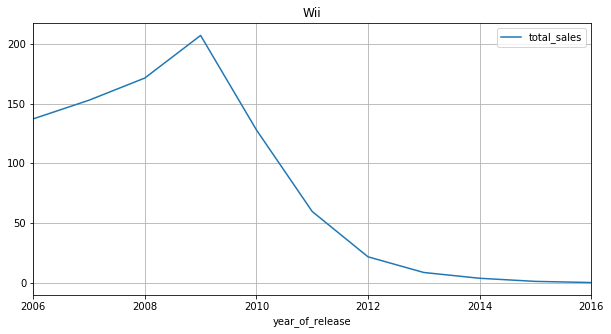

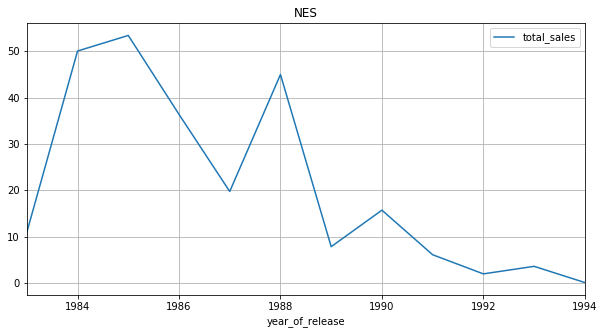

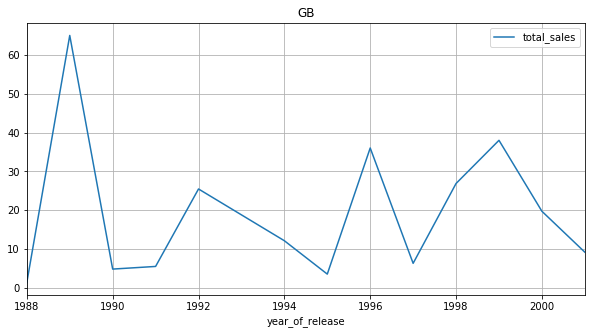

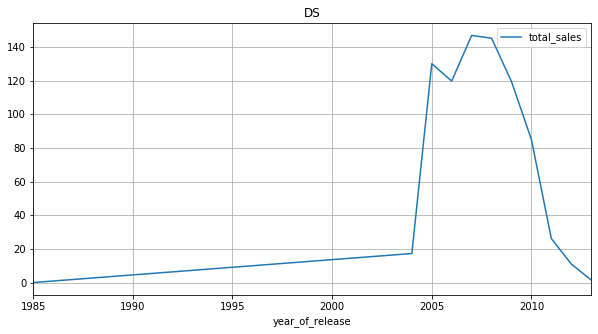

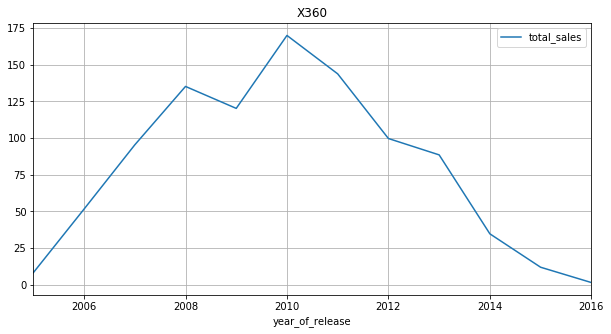

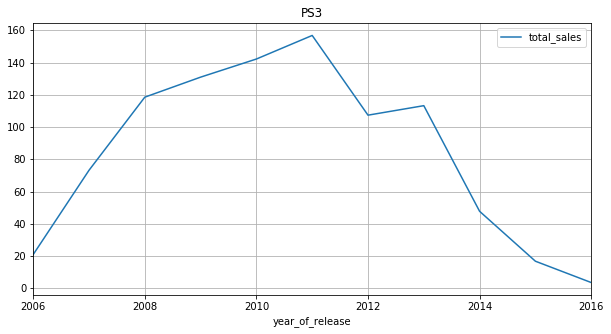

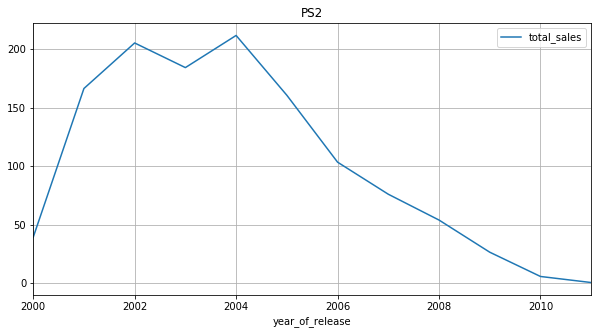

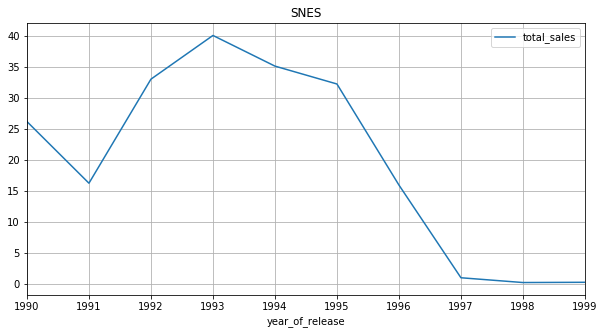

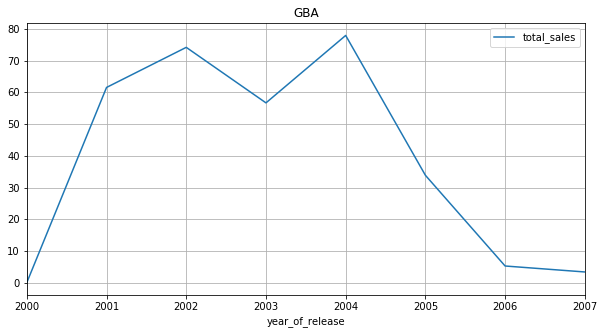

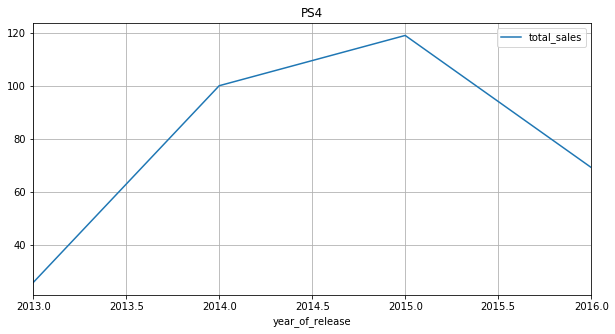

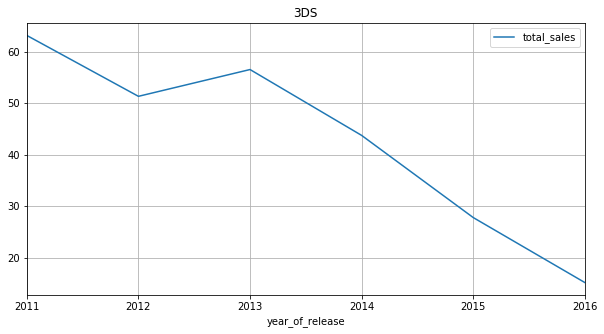

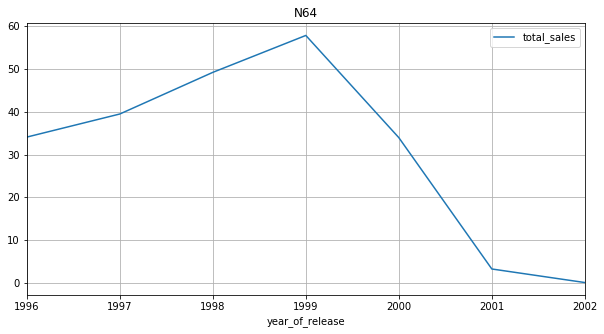

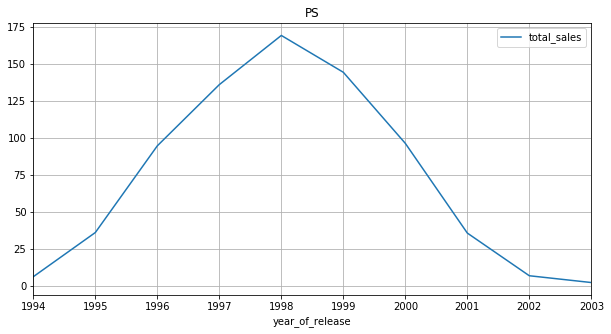

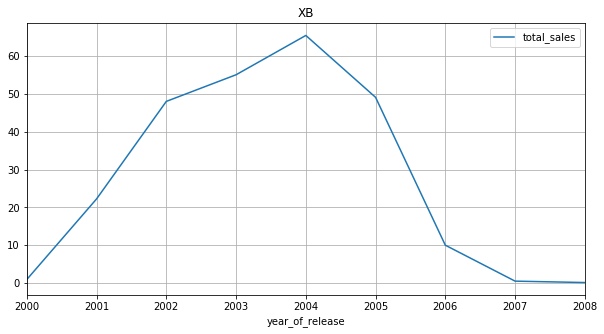

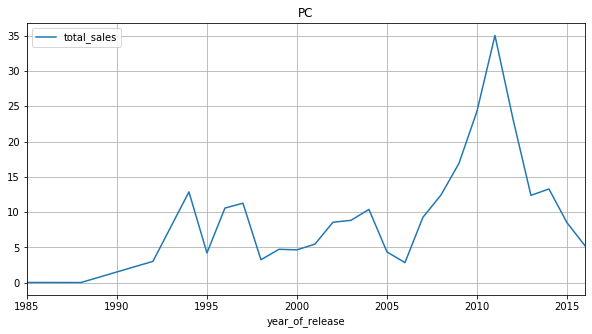

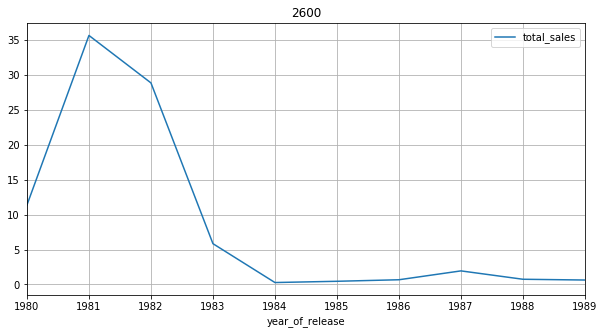

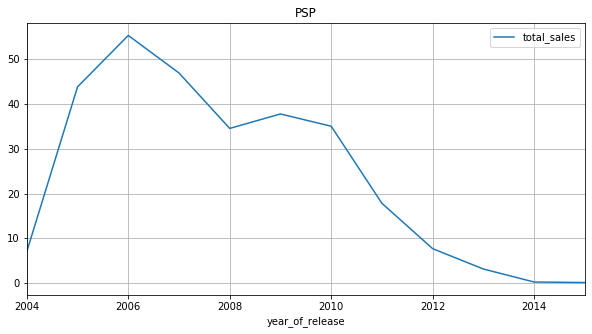

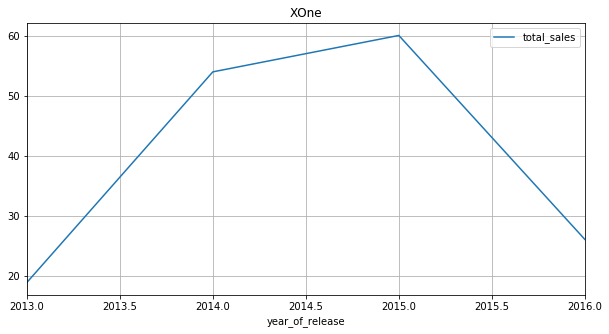

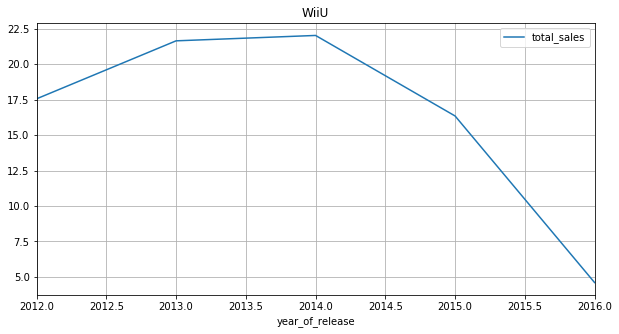

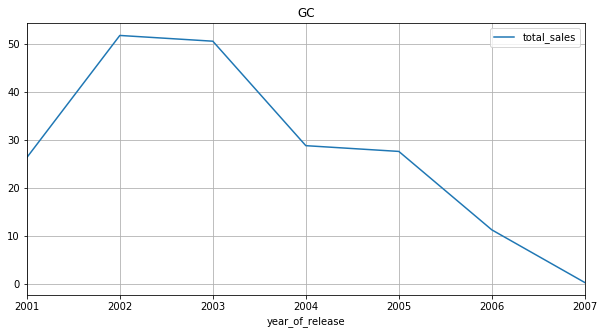

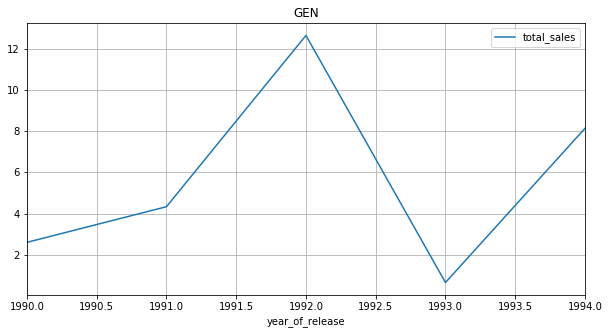

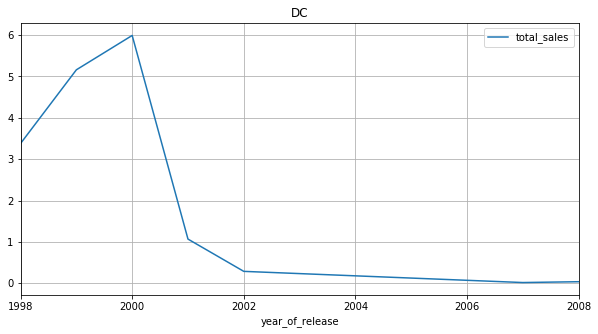

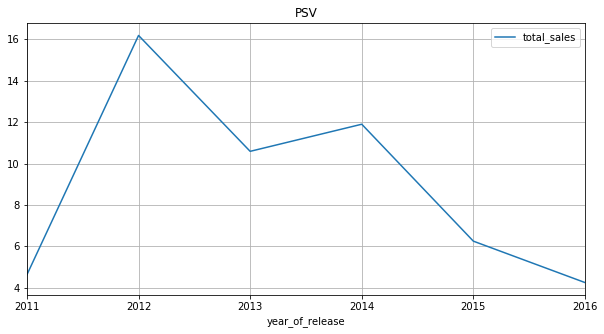

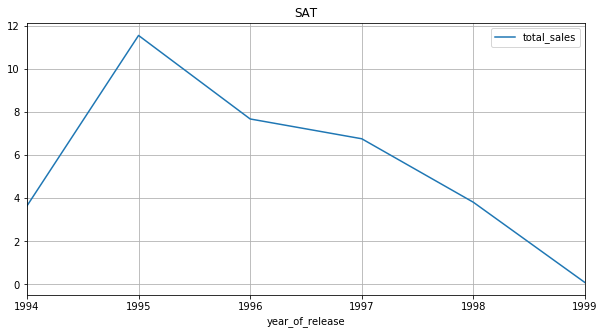

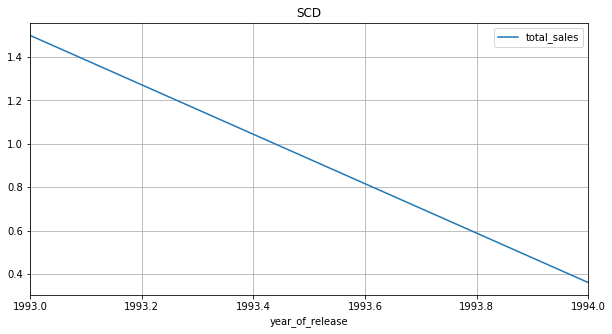

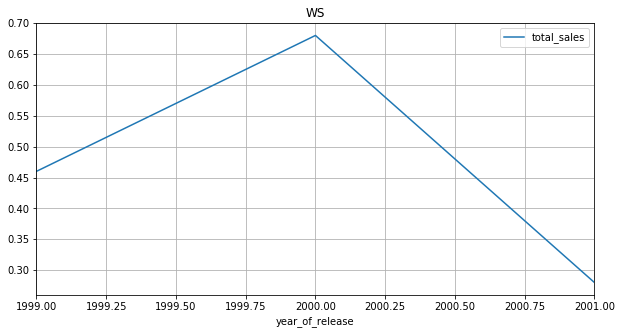

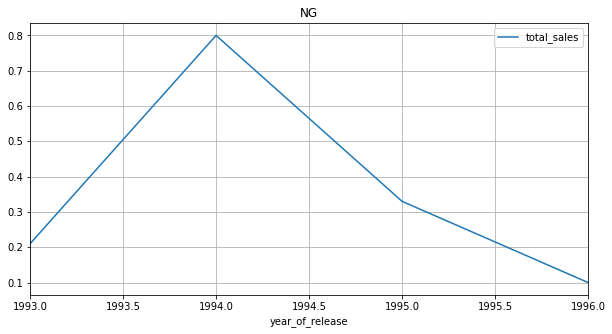

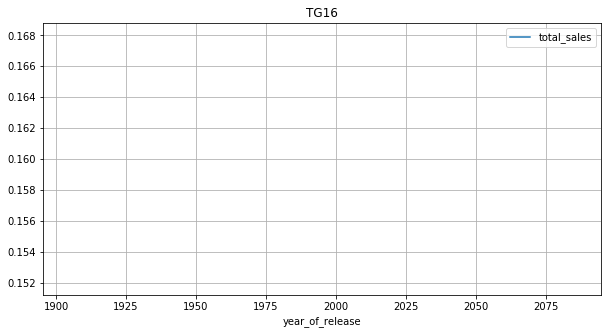

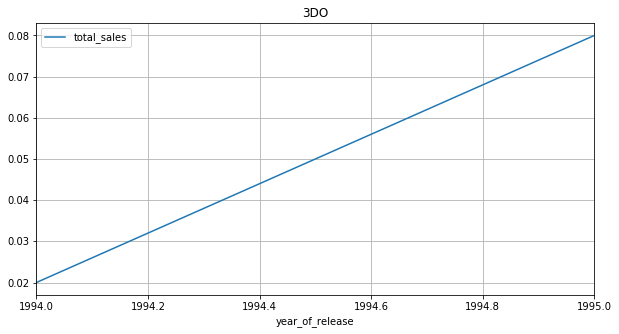

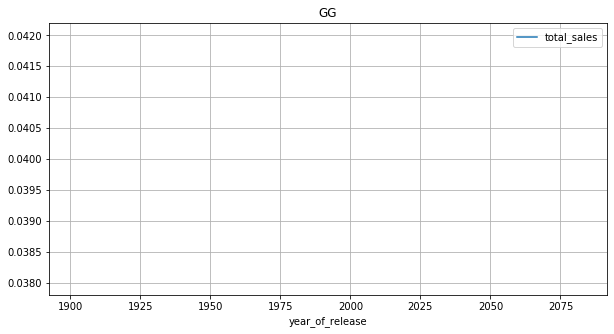

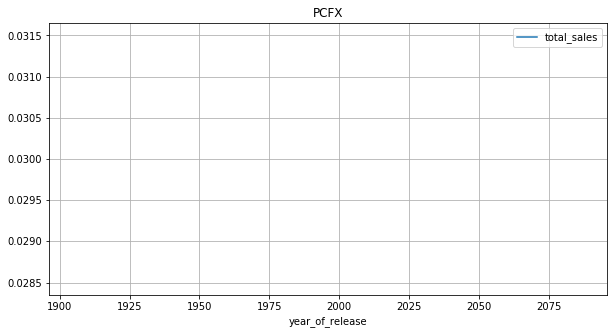

In [35]:
for i in platform_unique:
    data = df[df['platform']==i]
    data_pivot = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    data_pivot.plot(y='total_sales', title = i, grid=True, figsize=(10,5))

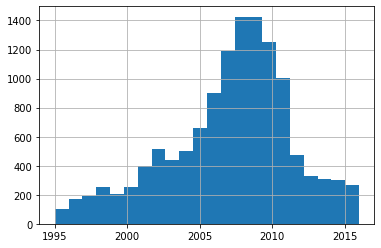

In [36]:
top_10_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
df_top_10 = df.query('platform in @top_10_sales.index')
df_top_10['year_of_release'].hist(bins = 22, range=(1995, 2016))

По графикам видим, что пики продаж приходится на первые 2-3 года существования платформ (исключением является ПК). Выделены 10 топовых платформ и по ним построено распределение по годам. Пик приходится на 2007 - 2010 года.

Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов.

In [37]:
#примем актуальный период начиная с 2011 до 2016 годы
df_actual_years = df.query('year_of_release > 2011')

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [38]:
actual_platform = df_actual_years['platform'].unique()

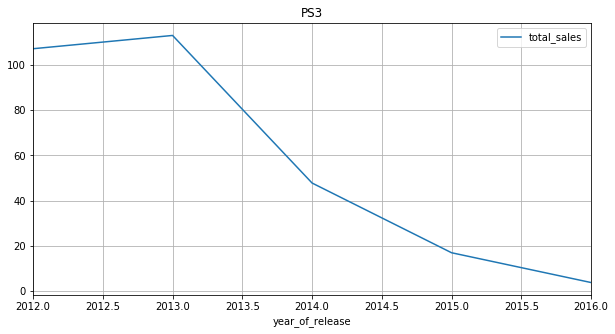

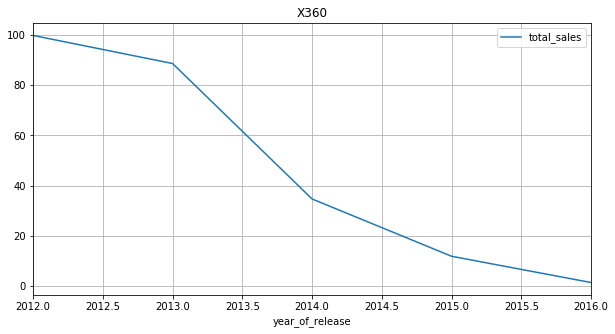

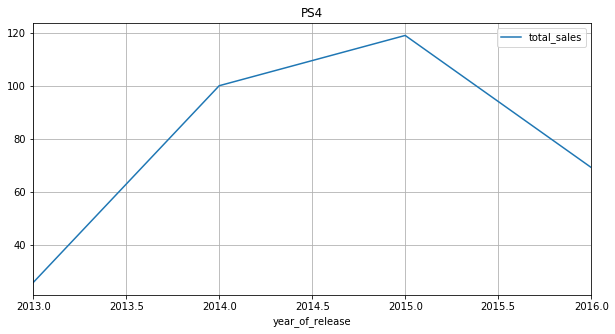

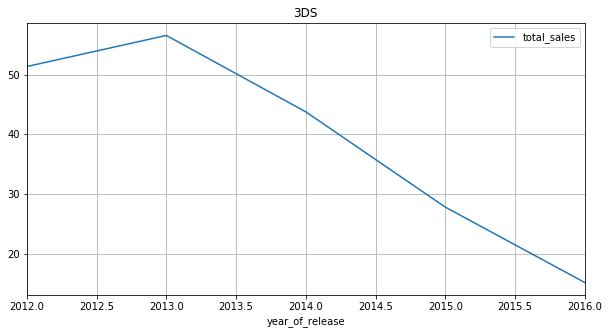

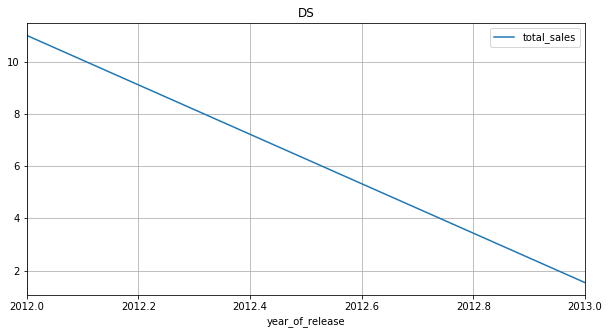

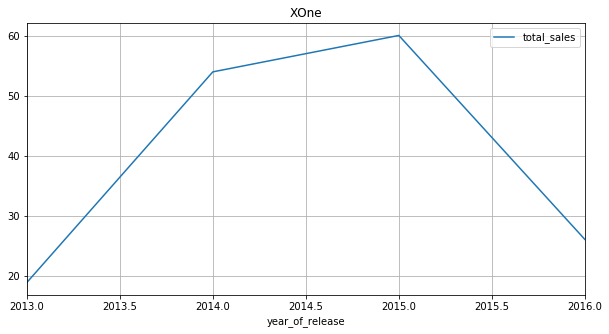

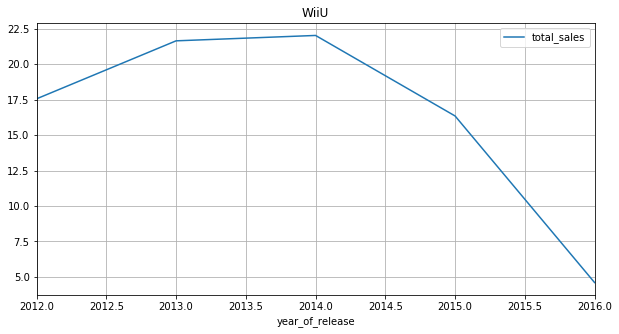

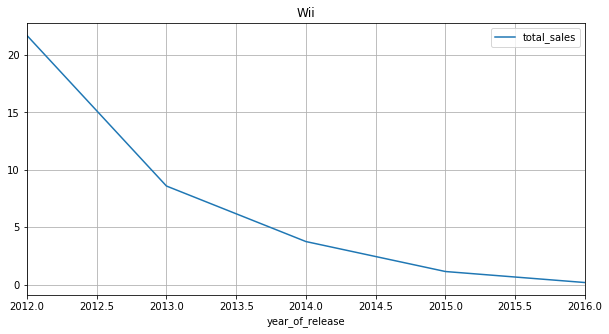

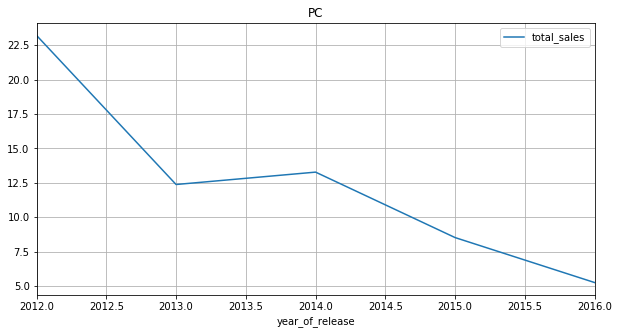

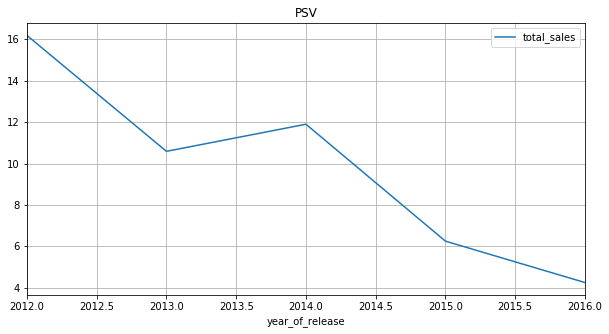

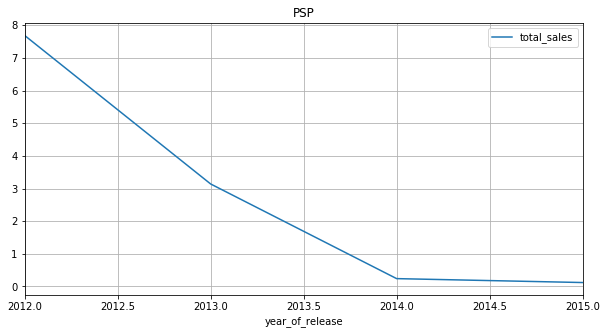

In [39]:
for i in actual_platform:
    data = df_actual_years[df_actual_years['platform']==i]
    data_pivot = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    data_pivot.plot(y='total_sales', title = i, grid=True, figsize=(10,5))

In [40]:
df_actual_platform_years = df_actual_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
df_actual_platform_years.reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


По продажам в основном лидируют платформы PS и Xbox от компании Sony и Microsoft соответственно. По графикам мы наблюдаем снижение объема продаж. Наиболее прибыльные платформы это PS4 и PS3. Перспективными будем считать PS3, PS4, X360, XOne, 3DS. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [41]:
df_actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [42]:
platform_name = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

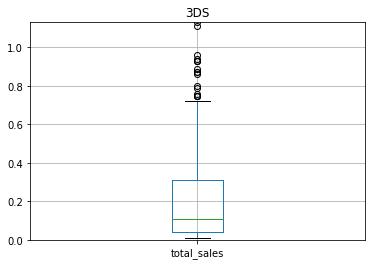

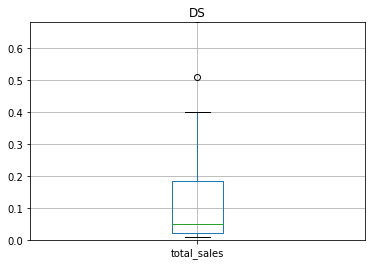

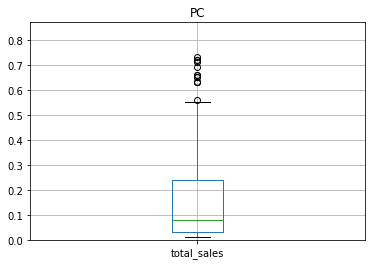

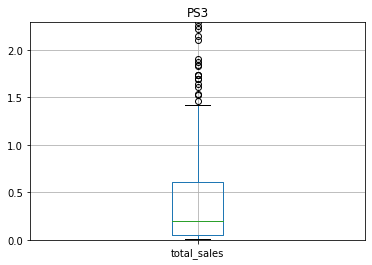

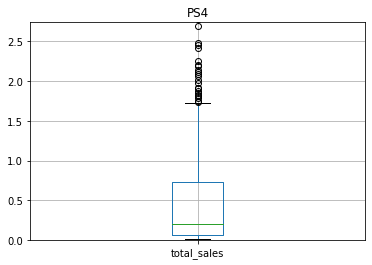

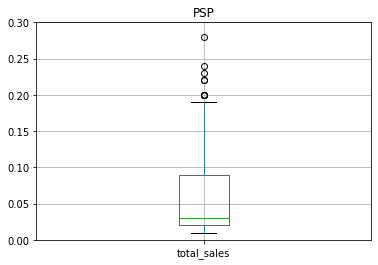

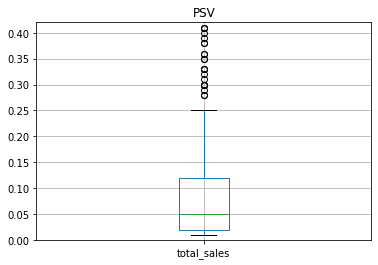

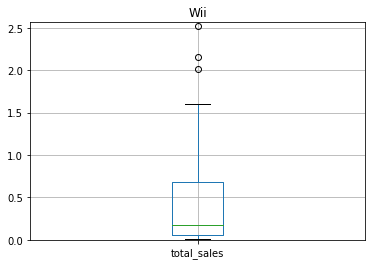

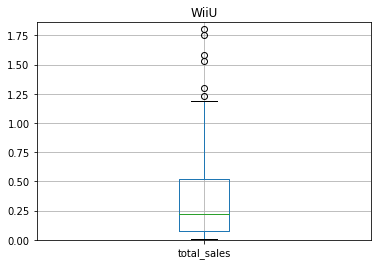

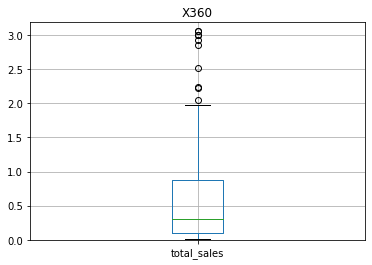

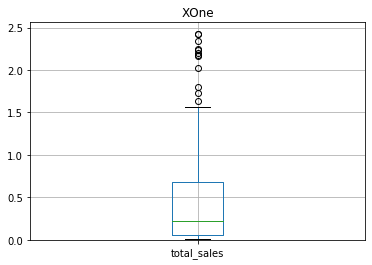

In [43]:
for i in platform_name:
    data_platform = df_actual_years.query('platform == @i')
    data = data_platform[['total_sales']]
    d1 = data.describe()#определяем квантили
    d2 = d1['total_sales']#присваиваем столбец новому параметру
    d3 = 3 * (d2[6] - d2[4]) + d2[6]#определяем межквартильный размах
    data.plot(kind='box',title=i, grid=True)
    plt.ylim(0,d3)#отрицательных значений у нас нет и не должно быть, d3 определяется в зависимости от столбца

Согласно boxplot'ам:<br>
1. 3DS - минимум 20 тыс. копий, максимум 800 тыс. копий;<br>
2. DS - минимум 20 тыс. копий, максимум 400 тыс. копий;<br>
3. PC - минимум 20 тыс. копий, максимум 700 тыс. копий;<br>
4. PS3 - минимум 20 тыс. копий, максимум 1,5 млн копий;<br>
5. PS4 - минимум 20 тыс. копий, максимум 1,8 млн. копий;<br>
6. PSP - минимум 20 тыс. копий, максимум 225 тыс. копий;<br>
7. PSV - минимум 20 тыс. копий, максимум 320 тыс. копий;<br>
8. Wii - минимум 20 тыс. копий, максимум 2,2 млн копий;<br>
9. WiiU - минимум 20 тыс. копий, максимум 1,25 млн копий;<br>
10. X360 - минимум 20 тыс. копий, максимум 2 млн. копий;<br>
11. XOne - минимум 20 тыс. копий, максимум 1,8 млн. копий;<br>
Видим, что самый большой показатель у платформ Wii и X360. Однако по общий продажам лидируют PS4. Объем продаж на мобильные платформы не превышает 1 млн. Большая часть населения отдает предпочтение стационарным игровым консолям./

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [44]:
#посмотрим как влияют на продажи отзывы пользователей и критиков для PS4
df_ps4 = df_actual_years[df_actual_years['platform']=='PS4']
df_ps4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014.0,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


In [45]:
df_ps4 = df_ps4[['total_sales', 'critic_score', 'user_score']]
df_ps4

,total_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7
...,...,...,...
16498,0.01,69.0,7.5
16501,0.01,NaN,NaN
16524,0.01,61.0,7.9
16528,0.01,51.0,5.5


In [46]:
df_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2495454610>,
      dtype=object)

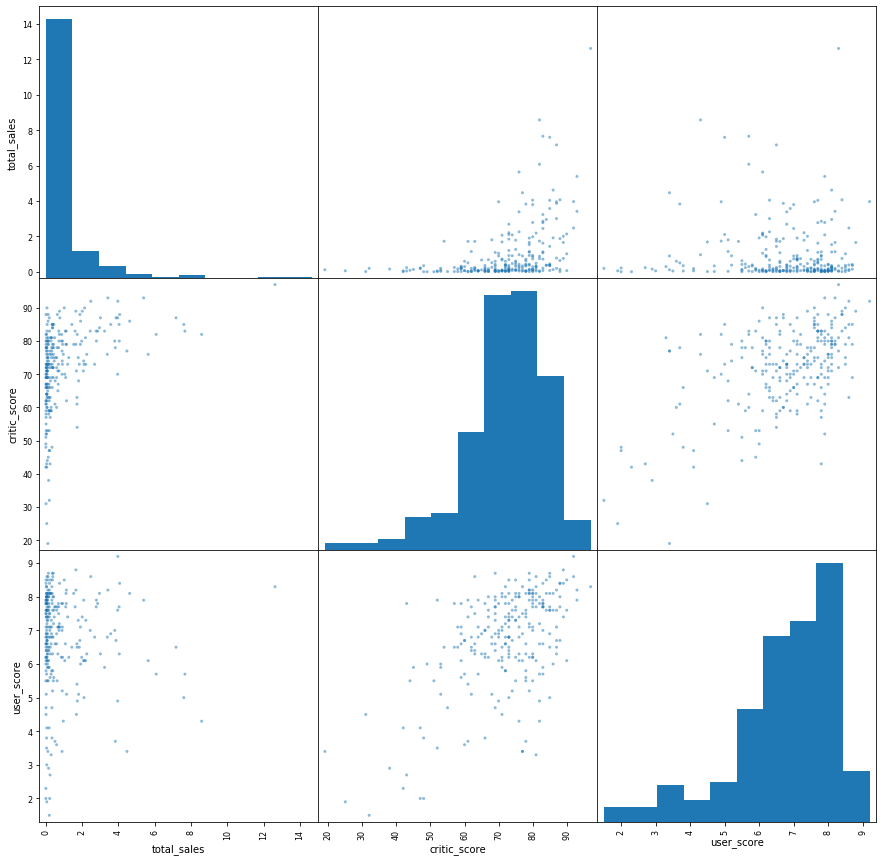

In [47]:
pd.plotting.scatter_matrix(df_ps4, figsize=(15, 15))

По диаграмме рассеяния видим, что в основном объем продаж зависит от отзывов критиков (оно и понятно, т.к. именно к ним и прислушиваются разные регионы), а вот отзывы пользователей никак не зависят от объемов продаж (порой даже странно, т.к. многие люди перед покупкой игр для платформы читают отзывы на всяких обзорах, где отзывы оставляют обычнею пользователи, но факт остается фактом). На основе диаграммы рассеяния можно предположить, что данная зависимость касается всех платформ.

In [48]:
#проверим корреляцию по другим платформам
for i in platform_name:
    df_other_platform = df_actual_years[df_actual_years['platform']==i]
    df_other_platform = df_other_platform[['total_sales', 'critic_score', 'user_score']]
    print(i)
    print(df_other_platform.corr())
    print()

3DS
              total_sales  critic_score  user_score
total_sales      1.000000      0.320803    0.197583
critic_score     0.320803      1.000000    0.722762
user_score       0.197583      0.722762    1.000000

DS
              total_sales  critic_score  user_score
total_sales      1.000000           NaN    0.882709
critic_score          NaN           NaN         NaN
user_score       0.882709           NaN    1.000000

PC
              total_sales  critic_score  user_score
total_sales      1.000000      0.237243   -0.121867
critic_score     0.237243      1.000000    0.432587
user_score      -0.121867      0.432587    1.000000

PS3
              total_sales  critic_score  user_score
total_sales      1.000000      0.331497   -0.005144
critic_score     0.331497      1.000000    0.539456
user_score      -0.005144      0.539456    1.000000

PS4
              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000   

На платформах 3DS, PC, PS3, WiiU, X360, XOne отзывы критиков влияют на объем продаж. DS и PSP отзывы критиков отсутсвуют, однако там объем продаж зависит от отзывы пользователей, причем на PSP корреляция отрицательная. На PSV отзывы критиков и пользователей практически не зависят на объем продаж. На Wii отзывы критиков негативно влияют на объем продаж.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

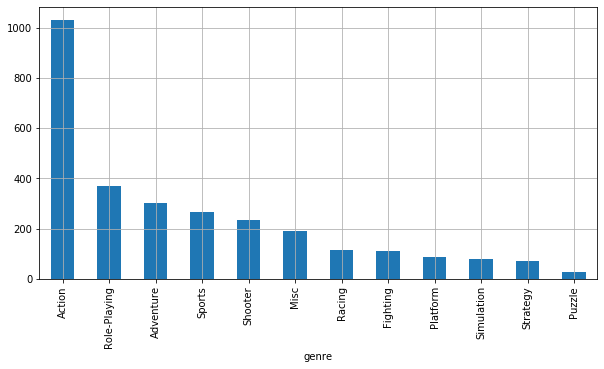

In [49]:
df_actual_years.groupby('genre')['name'].count().sort_values(ascending=False).plot(y='count', kind='bar', figsize=(10,5), grid=True)

Наибольшим спросом на всех платформах пользуются экшен жанры (более чем в 2,5 раза), наименьшим паззлы.

In [50]:
action = df_actual_years[df_actual_years['genre'] == 'Action']['total_sales'].sum()
action

441.12

In [51]:
puzzle = df_actual_years[df_actual_years['genre'] == 'Puzzle']['total_sales'].sum()
puzzle

4.89

# Вывод к шагу 3

Был построен график выпуска игр по годам. Начиная с 1995 года пошел резкий скачок продаж игр.<br>
Платформы с наибольшими продажами являются PS3, PS4, X360 и XOne от компании Sony и Microsoft. Пик продаж приходится на 2007 - 2008 годы. В среднем платформы существуют 8-10 лет.<br>
В результате исследования было выбран период с 2011 год (раньше брать тоже нет смысла, т.к. там охватываются платформы, которые прекратили свое существование и учитывать их нет смысла)<br>
Наиболее потенциально прибыльные платформы PS4 X360. На всех платформах на графиках видим спад объема продаж игр, т.к. осталось мало компаний которые выпускают игры.<br>
Были построены boxplot'ы по всем платформам с периода 2011 года. Были найдены "выбросы".<br>
Была проведена корреляция объема продаж от отзывов критиков и пользователей. Объемы продаж зависит только от отзывов критиков, отзывы пользователей никак не виляют. МОжно предположить что на других платформах ситуация будет аналогичной.<br>
Было построено распределение по жанрам. Наибольшим спросом пользуются экшен, наименьшим паззлы.

<a id='section_id4'></a>

# 4. Портрет пользователя каждого региона

Самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [52]:
#напишем общую функцию поплярных платформ и жанров для каждого континента (NA, EU, JP)
def continent(df, columns1, columns2):
    df_continent = df[[columns1, columns2]]
    df_continent = df_continent.groupby(columns1).sum().sort_values(by=columns2, ascending=False)
    return df_continent

In [53]:
#возьмем для na_sales platform
df_na_platform = continent(df_actual_years, 'platform', 'na_sales')
df_na_platform = df_na_platform.head()
df_na_platform

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


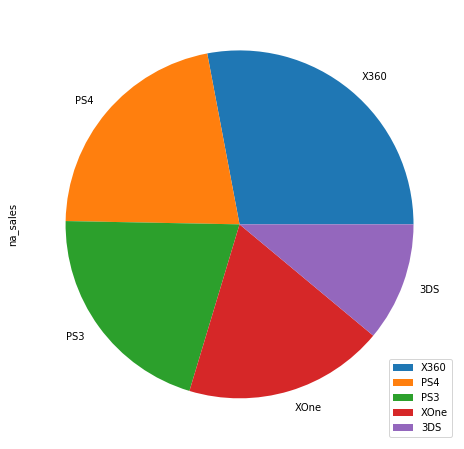

In [54]:
df_na_platform.plot(y='na_sales', kind='pie', figsize=(8,8))

In [55]:
share_na_platform= df_na_platform.sum()/(df_actual_years['total_sales'].sum())
share_na_platform

na_sales    0.34607
dtype: float64

In [56]:
#возьмем для eu_sales platform
df_eu_platform = continent(df_actual_years, 'platform', 'eu_sales')
df_eu_platform = df_eu_platform.head()
df_eu_platform

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


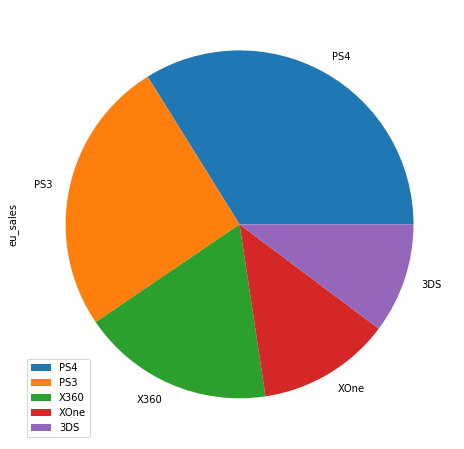

In [57]:
df_eu_platform.plot(y='eu_sales', kind='pie', figsize=(8,8))

In [58]:
share_eu_platform = df_eu_platform.sum()/(df_actual_years['total_sales'].sum())
share_eu_platform

eu_sales    0.288069
dtype: float64

In [59]:
#возьмем для jp_sales platform
df_jp_platform = continent(df_actual_years, 'platform', 'jp_sales')
df_jp_platform = df_jp_platform.head()
df_jp_platform

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


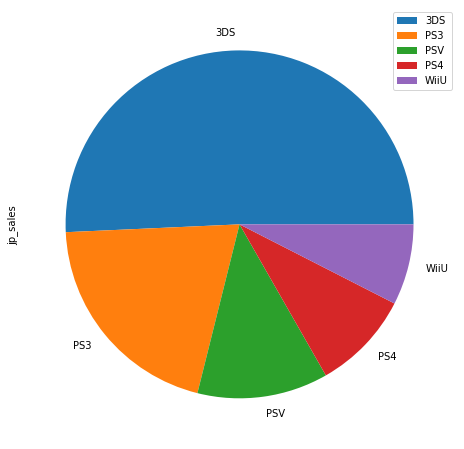

In [60]:
df_jp_platform.plot(y='jp_sales', kind='pie', figsize=(8,8))

In [61]:
share_jp_platform = df_jp_platform.sum()/(df_actual_years['total_sales'].sum())
share_jp_platform

jp_sales    0.119659
dtype: float64

In [62]:
#возьмем для na sales genre
df_na_genre = continent(df_actual_years, 'genre', 'na_sales')
df_na_genre = df_na_genre.head()
df_na_genre

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


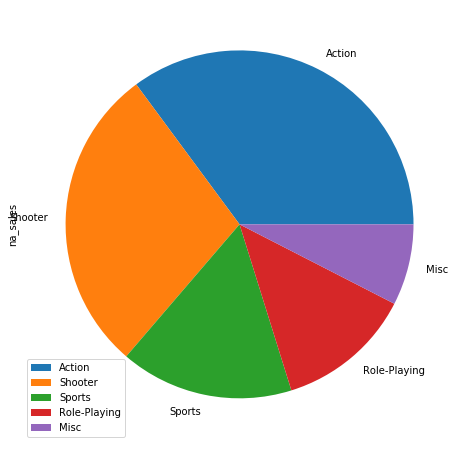

In [63]:
df_na_genre.plot(y='na_sales', kind='pie', figsize=(8,8))

In [64]:
#возьмем для eu sales genre
df_eu_genre = continent(df_actual_years, 'genre', 'eu_sales')
df_eu_genre = df_eu_genre.head()
df_eu_genre

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


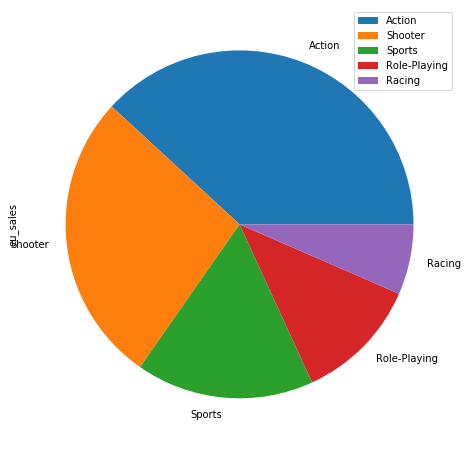

In [65]:
df_eu_genre.plot(y='eu_sales', kind='pie', figsize=(8,8))

In [66]:
#возьмем для jp sales genre
df_jp_genre = continent(df_actual_years, 'genre', 'jp_sales')
df_jp_genre = df_jp_genre.head()
df_jp_genre

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


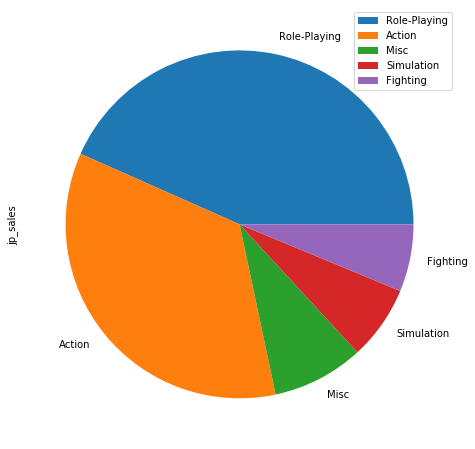

In [67]:
df_jp_genre.plot(y='jp_sales', kind='pie', figsize=(8,8))

В Северной Америке предпочтение отдают Xbox360, Европе PS4, а японцы предпочитают свою платформу 3DS чем PS (видимо 3DS более доступная для населения). Американцы и европейцы любят экшен игры, японцы ролевые)

In [68]:
text = ['Америке', 'Европе', 'Японии']

In [69]:
#функция для определения рейтингов по континентам
def ESRB_rating(df, columns, text):
    a = df[~df['rating'].isnull()][columns].sum()
    b = df[df['rating'].isnull()][columns].sum()
    if a > b:
        return ('рейтинг ESRB влияет на объем продаж в ' + str(text))
    else:
        return 'рейтинг ESRB не влияет на объем продаж в ' + str(text)

In [70]:
rating_ESRB_na = ESRB_rating(df_actual_years, 'na_sales', text[0])
rating_ESRB_na

'рейтинг ESRB влияет на объем продаж в Америке'

In [71]:
rating_ESRB_eu = ESRB_rating(df_actual_years, 'eu_sales', text[1])
rating_ESRB_eu

'рейтинг ESRB влияет на объем продаж в Европе'

In [72]:
rating_ESRB_jp = ESRB_rating(df_actual_years, 'jp_sales', text[2])
rating_ESRB_jp

'рейтинг ESRB не влияет на объем продаж в Японии'

По поводу рейтингов. Я создал функцию, которая считает объем продаж игр, где имеется рейтинг ESRB и объем продаж, где он отсутсвует. После создал операцию ветвления, если объем продаж ESRB > объема продаж без ESRB, то я предположил, что с рейтингом покупают чаще и от этого зависит. Если меньше, то рейтинг не зависит (это в Японии). В Японии рейтинг почему то не ставят на игры и соответственно у них этот рейтинг никак не влияет. Иначе я больше не могу предположить как решить данный вопрос:-)

#  Вывод к Шагу 4

Самые популярные платформы по континентам оказались следующими: В Северной Америке любят играть на платформе Xbox360 (разработка Microsoft и мб есть какие нибудь хорошие скидки), в Европе предпочтение отдают PS4 (видимо побогаче комплектация, например в PS4 входят 3 игрушки, тогда как Xbox 360 поставляется без нее). В Японии же предпочтение отдают 3DS компании Nintendo (Она почти в 2 раза дешевле PS4).<br>
В Америке и Европе любят играть в экшен жанры, Японии жанры ролевого характера.<br>
В Америке и Европе рейтинг ESRB влияет на объем продаж, в Японии же рейтинг никак не влияет.

<a id='section_id5'></a>

# 5. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;<br>
Альтернативная гипотеза H1: рейтинги на платформах разные.<br>

Применим гипотезу о равенстве средних двух генеральных совокупностей (рейтинги PC и Xbox One). Уровень значимости возьмем альфа равной 0.05.

In [73]:
#создадим 2 таблицы с PC и Xbox One
score_XOne = df_actual_years[(df_actual_years['platform']=='XOne') & (~df_actual_years['user_score'].isnull())]['user_score']

In [74]:
score_PC = df_actual_years[(df_actual_years['platform']=='PC') & (~df_actual_years['user_score'].isnull())]['user_score']

In [75]:
alpha = 0.05

Для проверки гипотез будем использовать критерий t Стьюдента. Применение t-критерия связаны с проверкой равенства средних значений в двух выборках. Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение.

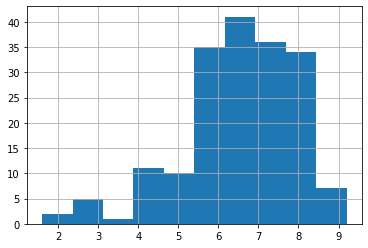

In [76]:
#проверим распределения
score_XOne.hist(bins=10)

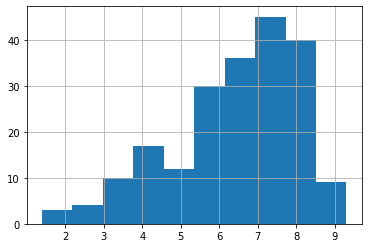

In [77]:
score_PC.hist(bins=10)

Гистограммы нормально распределены, но имеют скос влево (оно и нормально, ведь у нас 10 бальная система, в среднем 7,8 баллов от критиков)

In [78]:
#Посчитаем дисперсии 2-ух выборок для выбора параметров 
#Дисперсия XOne
variance_XOne = np.var(score_XOne)
variance_XOne

1.8965188383045526

In [79]:
#Дисперсия PC
variance_PC = np.var(score_PC)
variance_PC

2.7569952398906588

In [80]:
results = st.ttest_ind(
          score_PC,
          score_XOne,
          equal_var=False)

In [81]:
results.pvalue

0.5489537965134912

In [82]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что средний пользовательский рейтинг платформ XOne и PC отличается, но с вероятностью в почти 55% такое различие можно получить случайно. Это слишком высокая вероятность для того, чтобы делать выводы о значимом различии между средними значениями рейтинга.

Нулевая гипотеза H0: средние пользовательские рейтинги жанров Action и Sports одинаковые;<br>
Альтернативная гипотеза H1: cредние пользовательские рейтинги жанров Action и Sports разные<br>

Применим гипотезу о равенстве средних двух генеральных совокупностей (рейтинги Action и Sports). Уровень значимости возьмем альфа равной 0.05.

In [83]:
#создадим 2 таблицы с Action и Sports
score_action = df_actual_years[(df_actual_years['genre']=='Action') & (~df_actual_years['user_score'].isnull())]['user_score']

In [84]:
score_sports = df_actual_years[(df_actual_years['genre']=='Sports') & (~df_actual_years['user_score'].isnull())]['user_score']

In [85]:
variance_action = np.var(score_action)
variance_action

1.8854720340439224

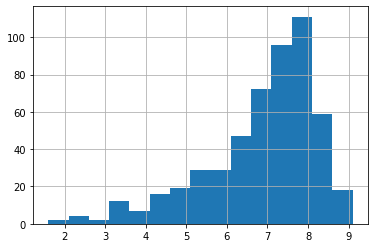

In [86]:
score_action.hist(bins=15)

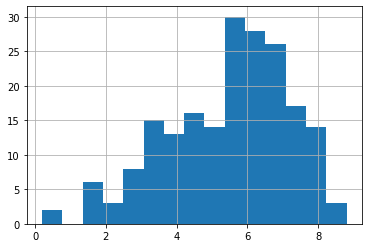

In [87]:
score_sports.hist(bins=15)

Нормально распределены отзывы по жанрам, но также со скосом влево (опять же всего 10 баллов)

In [88]:
variance_sports = np.var(score_sports)
variance_sports

3.0073882971729127

In [89]:
results_genre = st.ttest_ind(
          score_action,
          score_sports,
          equal_var = False)

In [90]:
results_genre.pvalue

4.24307776572644e-20

In [91]:
if (results_genre.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


# Вывод к Шагу 5

На данном шаге проводились проверки гипотез: средние рейтинги пользователий по платформам XOne и PC; жанрам Action и Sports. Первую гипотезу мы не отвергаем, т.к. предполагаем что на разных платформах, средние рейтинги могут одинаковыми, а вот по жанрам мы отвергаем гипотезу и принимаем альтернативную гипотезу, средние рейтинги пользователей по жанрам action и sports различаются (action жанры выпускаются все новые и новые и рейтинги на них разные, а вот sports из года в год выпускаются однотипные (пример тому: FIFA, NHL и т.д.)).

<a id='section_id6'></a>

# 6. Общий вывод

В ходе выполнения работ была выполнена предобработка данных: отзывы критиков и пользователей были заполнены медианой по одинаковым играм, но на разных платформах (я думаю что отзывы должны быть одинаковыми, т.к. рейтинг ставят игре а не платформе).<br>

Исследовательский анализ данных показал, максимальный пик продаж пришелся на 2007 - 2011 годы. По платформам максимальный пик продаж приходился на первые два года существования платформ. В среднем платформы живут 8-10 лет и на основе этого можно предполагать закупать игрушки на данную платформу. Для анализа я использовал года начиная с 2011 года, т.к. в этот период начали появляться новые платформы, а старые платформы для анализа на 2017 год не актуально. Для топовых платформ были построены "ящики с усами" и выявлено, что в среднем на X360 максимальное число копий выходит около 2 млн копий, Wii - 2.2 млн, PS4 - 1.8 млн. копий. Была проведена корреляция, как зависят отзывы критиков и пользвателей от объема продаж. Как видим по диаграмме рассеяния, объем продаж зависит от отзывов критиков. Чем выше отзыв, тем лучше продается игра. Можно предположить, что по другим популярным платформам ситуация будет почти идентичной. Распределение по жанрам показывает, что наиболее популярным жанром является экшен, наименее паззлы (паззлы однотипные и нет смысла их выпускать все время).<br>

Были определены портреты пользователей по регионам. В Северной Америке больше любят Xbox360 от Microsoft (сюда можно больше на этой платформе продавать игры на этой платформе), в Европе PS4, а в Японии 3DS. Американцы и европейцы любят экшен жанры, а японцы жанры ролевого характера. Рейтинг ESRB влияет на объем продаж только в Америке и Европе. В Японии же рейтинг не зависит от объема продаж.<br>

Также были проверены 2 гипотезы:1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.<br>
Первую гипотезу мы не отвергаем, предполагаем что на одинаковые игры отзывы примерно одинаковые на разных платформах. Вторя же гипотеза отвергается, т.к. жанр SPorts практические однотипные (FIFA, NHL, NBA) и отзывы видимо примерно всегда одинаковые ни хуже ни лучше, c экшен жанром все иначе, игры там все время меняются (новая графика, новый сюжет, богатый арсенал).